In [1]:
import pandas as pd
#mmake excel file to pd
data1= pd.read_excel('data/data1analytical.xlsx')
#in the period column change the valuse based on the MAT= Year Now  MATYA= Year Before 
data1['Period'] = data1['Period'].replace(['MAT','MATYA'],['Year Now','Year Before'])
data1

,Date_Year,Date_MonthName,StoreId,Subcategory,Quantity,Revenue,Period,Type,Area
0,2022,June,4008,SWEET BAKERY SNACKS,24.0,24.40,Year Before,Kiosk,Μακεδονία και Θράκη
1,2021,November,10254,TOBACCO ACCESSORIES,2156.0,1437.80,Year Before,Kiosk,Μακεδονία και Θράκη
2,2022,August,5122,ΟΥΖΟ,3.0,11.00,Year Before,Kiosk,Δυτική και Κεντρική Ελλάδα
3,2022,June,10254,CORN,51.0,74.00,Year Before,Kiosk,Μακεδονία και Θράκη
4,2022,October,10280,STICK,122.0,277.80,Year Before,Kiosk,Αττική
...,...,...,...,...,...,...,...,...,...
351094,2023,March,7986,WHISKY,1.0,23.00,Year Now,Mini-Market,Μακεδονία και Θράκη
351095,2023,January,6532,SANDWICH,29.0,48.50,Year Now,Kiosk,Νησιά
351096,2023,January,3545,ICE TEA,11.0,20.00,Year Now,Mini-Market,Αττική
351097,2022,December,3813,COLAS,364.0,653.64,Year Now,Kiosk,Πελοπόννησος


In [2]:
data1['Period'] = data1['Period'].replace(['MAT','MATYA'],['Year Now','Year Before'])
data1

,Date_Year,Date_MonthName,StoreId,Subcategory,Quantity,Revenue,Period,Type,Area
0,2022,June,4008,SWEET BAKERY SNACKS,24.0,24.40,Year Before,Kiosk,Μακεδονία και Θράκη
1,2021,November,10254,TOBACCO ACCESSORIES,2156.0,1437.80,Year Before,Kiosk,Μακεδονία και Θράκη
2,2022,August,5122,ΟΥΖΟ,3.0,11.00,Year Before,Kiosk,Δυτική και Κεντρική Ελλάδα
3,2022,June,10254,CORN,51.0,74.00,Year Before,Kiosk,Μακεδονία και Θράκη
4,2022,October,10280,STICK,122.0,277.80,Year Before,Kiosk,Αττική
...,...,...,...,...,...,...,...,...,...
351094,2023,March,7986,WHISKY,1.0,23.00,Year Now,Mini-Market,Μακεδονία και Θράκη
351095,2023,January,6532,SANDWICH,29.0,48.50,Year Now,Kiosk,Νησιά
351096,2023,January,3545,ICE TEA,11.0,20.00,Year Now,Mini-Market,Αττική
351097,2022,December,3813,COLAS,364.0,653.64,Year Now,Kiosk,Πελοπόννησος


In [3]:
total_mm_revenue = data1.groupby(['Period'])['Revenue'].sum().reset_index()
total_mm_revenue

,Period,Revenue
0,Year Before,1.200199e+08
1,Year Now,1.297343e+08


In [4]:
sales_per_catrgory = data1.groupby(['Subcategory','Period'])[['Revenue','Quantity']].sum().reset_index()
sales_per_catrgory

,Subcategory,Period,Revenue,Quantity
0,ALOE VERA,Year Before,39974.16,22331.0
1,ALOE VERA,Year Now,31501.21,17111.0
2,BAR ICE CREAM,Year Before,54676.57,23325.0
3,BAR ICE CREAM,Year Now,63682.87,22974.0
4,BAR SNACKS,Year Before,153697.16,98917.0
...,...,...,...,...
194,YOGURT,Year Now,338554.59,141253.0
195,ΟΥΖΟ,Year Before,86790.22,18592.0
196,ΟΥΖΟ,Year Now,107074.29,21499.0
197,ΤΣΙΠΟΥΡΟ,Year Before,143537.60,37168.0


In [5]:
sales_per_catrgory['Revenue_pct_change'] = sales_per_catrgory.groupby(['Subcategory'])['Revenue'].pct_change()
sales_per_catrgory

,Subcategory,Period,Revenue,Quantity,Revenue_pct_change
0,ALOE VERA,Year Before,39974.16,22331.0,NaN
1,ALOE VERA,Year Now,31501.21,17111.0,-0.211961
2,BAR ICE CREAM,Year Before,54676.57,23325.0,NaN
3,BAR ICE CREAM,Year Now,63682.87,22974.0,0.164720
4,BAR SNACKS,Year Before,153697.16,98917.0,NaN
...,...,...,...,...,...
194,YOGURT,Year Now,338554.59,141253.0,0.054635
195,ΟΥΖΟ,Year Before,86790.22,18592.0,NaN
196,ΟΥΖΟ,Year Now,107074.29,21499.0,0.233714
197,ΤΣΙΠΟΥΡΟ,Year Before,143537.60,37168.0,NaN


In [6]:
sales_per_catrgory.sort_values(by=['Revenue_pct_change'],ascending=False,inplace=True)
sales_per_catrgory

,Subcategory,Period,Revenue,Quantity,Revenue_pct_change
180,VAPE,Year Now,2452232.80,339577.0,1.072153
178,TOYS,Year Now,618036.87,409855.0,0.970880
23,CHOCO COATED,Year Now,65274.79,31789.0,0.486394
138,REST SALTY SNACKS,Year Now,62169.15,36855.0,0.374489
19,CHEWING GUMS,Year Now,625973.51,811170.0,0.347793
...,...,...,...,...,...
189,WHISKY,Year Before,405801.84,22269.0,NaN
191,WINE,Year Before,492603.59,140888.0,NaN
193,YOGURT,Year Before,321015.96,145765.0,NaN
195,ΟΥΖΟ,Year Before,86790.22,18592.0,NaN


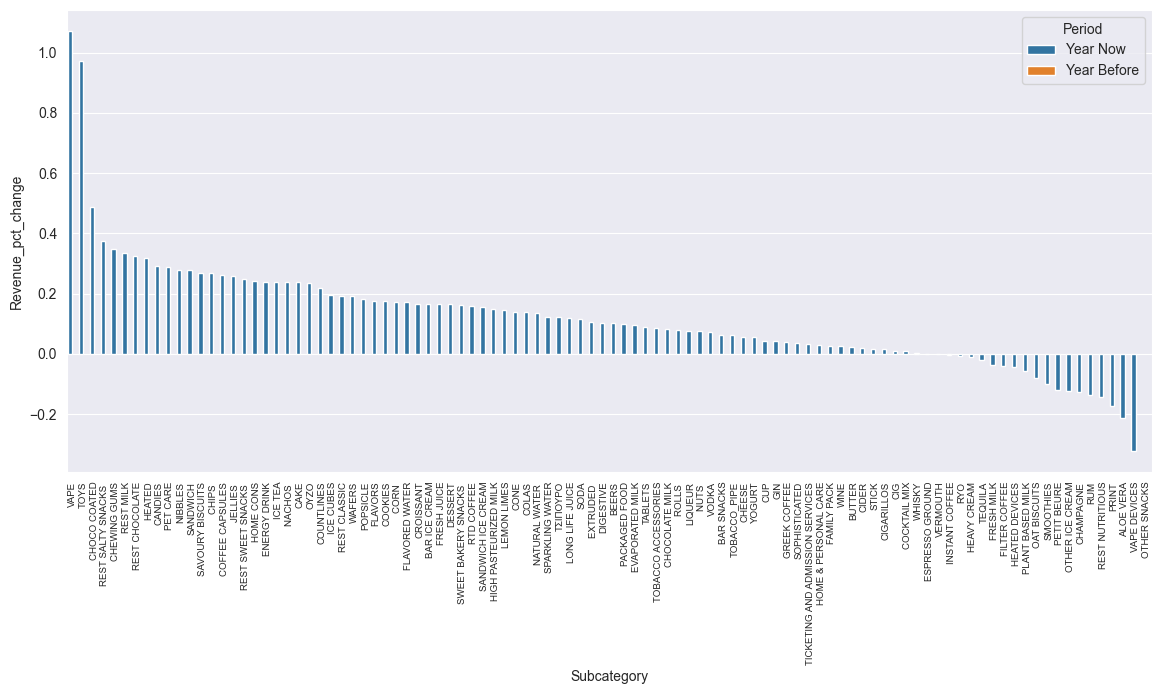

In [7]:
# plot the Revenue_pct_change
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
sns.barplot(x='Subcategory',y='Revenue_pct_change',hue='Period',data=sales_per_catrgory)
plt.xticks(rotation=90)
# make the labels of x axis readable
plt.xticks(fontsize=7)

plt.show()


In [8]:
#create a table with stie id the rows and subcategory in the columns and revenue as values
sales_per_site = data1.pivot_table(index='StoreId',columns='Subcategory',values='Revenue',aggfunc='sum')
sales_per_site

Subcategory,ALOE VERA,BAR ICE CREAM,BAR SNACKS,BEERS,BUTTER,CAKE,CANDIES,CHAMPAGNE,CHEESE,CHEWING GUMS,...,VAPE,VAPE DEVICES,VERMOUTH,VODKA,WAFERS,WHISKY,WINE,YOGURT,ΟΥΖΟ,ΤΣΙΠΟΥΡΟ
StoreId,,,,,,,,,,,,,,,,,,,,,
3435,52.50,4851.9,5103.70,115448.39,NaN,2308.50,8937.90,NaN,NaN,11950.91,...,24747.90,1142.00,NaN,2586.7,7545.90,2845.10,4315.70,3157.00,1300.00,2624.40
3439,60.80,304.1,916.60,20762.40,28.20,1520.10,3862.80,NaN,11.60,6236.75,...,30636.00,600.00,NaN,4186.8,3548.10,2134.20,4255.50,1145.90,1512.90,26.50
3484,101.80,NaN,296.80,20743.60,NaN,13.20,2242.26,NaN,NaN,4815.30,...,9951.71,150.92,NaN,NaN,1651.75,NaN,1516.00,NaN,NaN,7.80
3493,385.82,NaN,545.30,23503.60,4.80,628.00,3378.22,NaN,424.80,5073.04,...,38266.80,428.00,NaN,5138.8,3066.80,4434.10,1148.80,1106.20,433.60,NaN
3521,182.50,67.1,1076.50,13470.00,NaN,692.80,2516.60,NaN,NaN,3324.90,...,8207.50,NaN,NaN,161.9,1968.30,590.00,72.50,1160.40,403.90,991.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,801.00,135.2,2576.00,81835.58,1609.40,2873.25,6824.30,NaN,14581.33,7191.21,...,49471.50,2509.20,142.5,19998.5,6611.29,54916.58,34207.41,12116.75,2524.10,1636.62
10884,129.60,NaN,375.50,17993.30,NaN,272.80,1308.70,NaN,10.00,1633.30,...,7347.90,468.00,NaN,221.0,1232.70,328.00,478.80,81.70,660.60,540.80
10923,239.83,1779.7,1832.31,25683.09,620.25,709.80,3709.50,163.5,3895.92,6845.46,...,29151.99,671.00,82.0,2700.6,2387.76,4043.70,5173.19,2541.35,641.25,1545.00


In [9]:
#export the table to excel
#makes null values to 0
sales_per_site.fillna(0,inplace=True)
sales_per_site

Subcategory,ALOE VERA,BAR ICE CREAM,BAR SNACKS,BEERS,BUTTER,CAKE,CANDIES,CHAMPAGNE,CHEESE,CHEWING GUMS,...,VAPE,VAPE DEVICES,VERMOUTH,VODKA,WAFERS,WHISKY,WINE,YOGURT,ΟΥΖΟ,ΤΣΙΠΟΥΡΟ
StoreId,,,,,,,,,,,,,,,,,,,,,
3435,52.50,4851.9,5103.70,115448.39,0.00,2308.50,8937.90,0.0,0.00,11950.91,...,24747.90,1142.00,0.0,2586.7,7545.90,2845.10,4315.70,3157.00,1300.00,2624.40
3439,60.80,304.1,916.60,20762.40,28.20,1520.10,3862.80,0.0,11.60,6236.75,...,30636.00,600.00,0.0,4186.8,3548.10,2134.20,4255.50,1145.90,1512.90,26.50
3484,101.80,0.0,296.80,20743.60,0.00,13.20,2242.26,0.0,0.00,4815.30,...,9951.71,150.92,0.0,0.0,1651.75,0.00,1516.00,0.00,0.00,7.80
3493,385.82,0.0,545.30,23503.60,4.80,628.00,3378.22,0.0,424.80,5073.04,...,38266.80,428.00,0.0,5138.8,3066.80,4434.10,1148.80,1106.20,433.60,0.00
3521,182.50,67.1,1076.50,13470.00,0.00,692.80,2516.60,0.0,0.00,3324.90,...,8207.50,0.00,0.0,161.9,1968.30,590.00,72.50,1160.40,403.90,991.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,801.00,135.2,2576.00,81835.58,1609.40,2873.25,6824.30,0.0,14581.33,7191.21,...,49471.50,2509.20,142.5,19998.5,6611.29,54916.58,34207.41,12116.75,2524.10,1636.62
10884,129.60,0.0,375.50,17993.30,0.00,272.80,1308.70,0.0,10.00,1633.30,...,7347.90,468.00,0.0,221.0,1232.70,328.00,478.80,81.70,660.60,540.80
10923,239.83,1779.7,1832.31,25683.09,620.25,709.80,3709.50,163.5,3895.92,6845.46,...,29151.99,671.00,82.0,2700.6,2387.76,4043.70,5173.19,2541.35,641.25,1545.00


In [10]:
sales_per_site.to_excel('data/sales_per_site.xlsx')